# Develop the function to read in images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MorphSED.morphsed import image, image_atlas
import glob

import matplotlib as mpl
mpl.rc("xtick", direction="in", labelsize=18)
mpl.rc("ytick", direction="in", labelsize=18)
mpl.rc("xtick.major", width=1., size=8)
mpl.rc("ytick.major", width=1., size=8)
mpl.rc("xtick.minor", width=1., size=5)
mpl.rc("ytick.minor", width=1., size=5)

%load_ext autoreload
%autoreload 2

### Load a single image

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


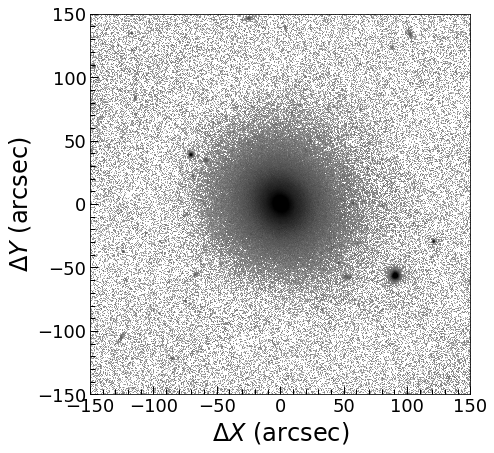

In [2]:
img = image('data/NGC1400/cutout_rings.v3.skycell.0893.033.stk.g.unconv.fits', 
            unit='adu')

# Plot it
mean, med, std = img.sigma_clipped_stats()
vmin = med - 0 * std
vmax = med + 100 * std
img.plot(vmin=vmin, vmax=vmax, a=1e-4)
plt.show()

### Load a list of images

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


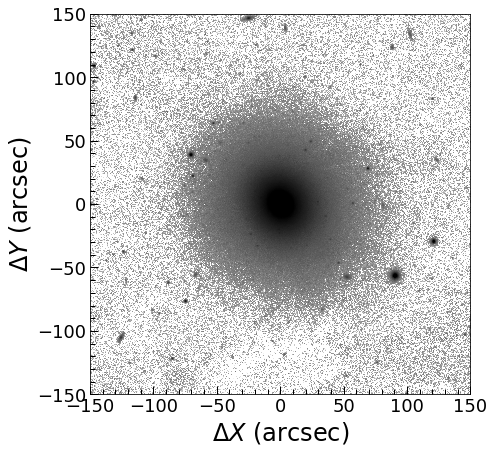

In [4]:
flist = sorted(glob.glob('data/NGC1400/*'))
image_list = [image(f, unit='adu') for f in flist]
band_list=['panstarrs.g_P1', 'panstarrs.r_P1', 'panstarrs.i_P1', 'panstarrs.z_P1', 'panstarrs.y_P1']
imgs = image_atlas(image_list=image_list, band_list=band_list)

img = imgs['panstarrs.r_P1']
mean, med, std = img.sigma_clipped_stats()
vmin = med - 0 * std
vmax = med + 100 * std
img.plot(vmin=vmin, vmax=vmax, a=1e-4)
plt.show()

24.56